# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from scipy import stats as st 

## Load data

In [2]:
# Load the data files into different DataFrames
try:
    megaline_calls= pd.read_csv('megaline_calls.csv')
except:
    megaline_calls = pd.read_csv('datasets/megaline_calls.csv')

megaline_calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [3]:
megaline_calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [4]:
megaline_calls.isnull().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [3]:
try:
    megaline_internet= pd.read_csv('megaline_internet.csv')
except:
    megaline_internet = pd.read_csv('datasets/megaline_internet.csv')

megaline_internet.head()


,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [6]:
megaline_internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


In [7]:
megaline_internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [4]:
try:
    megaline_messages= pd.read_csv('megaline_messages.csv')
except:
    megaline_messages = pd.read_csv('datasets/megaline_messages.csv')

megaline_messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [9]:
megaline_messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [10]:
megaline_messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [5]:
try:
    megaline_plans= pd.read_csv('megaline_plans.csv')
except:
    megaline_plans = pd.read_csv('datasets/megaline_plans.csv')

megaline_plans.head()


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [6]:
try:
    megaline_users= pd.read_csv('megaline_users.csv')
except:
    megaline_users = pd.read_csv('datasets/megaline_users.csv')

megaline_users.head()


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [13]:
megaline_users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [14]:
megaline_users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

Nulls in `churn_date` is just because the users are still using the data at the time exported the data so I would keep it as NaN until I need to change it 

## Prepare the data

We already explored it while exporting them

## Plans

In [15]:
# Print the general/summary information about the plans' DataFrame
megaline_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [16]:
# Print a sample of data for plans
megaline_plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

It's just general summary of the two plans we have there's nothing to do with these two cells

There are some nulls in `churn_date` in megaline_users but as I explained before it's not missing values and I understand their meaning so I wouldn't change it, another thing would be the type of date in all datasets, I need to change it to dt type not object.

## Fix data

[Fix obvious issues with the data given the initial observations.]

There's nothing to fix 

## Enrich data

[Add additional factors to the data if you believe they might be useful.]

Nothing to add

## Users

In [17]:
# Print the general/summary information about the users' DataFrame
megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [18]:
# Print a sample of data for users
megaline_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [19]:
megaline_users.duplicated().sum()

0

In [20]:
megaline_users.duplicated(subset=['first_name', 'last_name'], keep=False).sum()

0

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

There are some nulls in `churn_date` in megaline_users but as I explained before it's not missing values and I understand their meaning so I wouldn't change it, another thing would be the type of date in all datasets, I need to change it to dt type not leaving it as object. 

### Fix Data

[Fix obvious issues with the data given the initial observations.]

In [21]:
megaline_users['reg_date'] = pd.to_datetime(megaline_users['reg_date'])
megaline_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


### Enrich Data

[Add additional factors to the data if you believe they might be useful.]

In [22]:
#getting the regesteration month and day to analyse which month we got the most new customers
megaline_users['reg_date_month'] = megaline_users['reg_date'].dt.month
megaline_users['reg_date_day'] = megaline_users['reg_date'].dt.day
megaline_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_date_month,reg_date_day
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN,12,24
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN,8,13
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN,10,21
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN,1,28
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN,5,23


In [23]:
megaline_users.describe(include='all')

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,reg_date_month,reg_date_day
count,500.000000,500,500,500.000000,500,500,500,34,500.000000,500.000000
unique,NaN,458,399,NaN,73,266,2,29,NaN,NaN
top,NaN,Jasper,David,NaN,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-12 00:00:00,surf,2018-12-18,NaN,NaN
freq,NaN,3,3,NaN,80,5,339,3,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,2018-01-01 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2018-12-31 00:00:00,NaN,NaN,NaN,NaN
mean,1249.500000,NaN,NaN,45.486000,NaN,NaN,NaN,NaN,6.290000,15.572000
std,144.481833,NaN,NaN,16.972269,NaN,NaN,NaN,NaN,3.438247,8.924804
min,1000.000000,NaN,NaN,18.000000,NaN,NaN,NaN,NaN,1.000000,1.000000
25%,1124.750000,NaN,NaN,30.000000,NaN,NaN,NaN,NaN,3.000000,8.000000


## Calls

In [24]:
# Print the general/summary information about the calls' DataFrame
megaline_calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [25]:
# Print a sample of data for calls
megaline_calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [26]:
megaline_calls.duplicated().sum()

0

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

There's only the date problem

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [27]:
megaline_calls['call_date'] = pd.to_datetime(megaline_calls['call_date'])

### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [28]:
#getting the call date month and day to analyse which month we got the most calls, and column for rounding up the minutes of each call
megaline_calls['call_date_month'] = megaline_calls['call_date'].dt.month
megaline_calls['call_date_day'] = megaline_calls['call_date'].dt.day
megaline_calls['up_duration'] = np.ceil(megaline_calls['duration']).astype(int)
megaline_calls.head()

,id,user_id,call_date,duration,call_date_month,call_date_day,up_duration
0,1000_93,1000,2018-12-27,8.52,12,27,9
1,1000_145,1000,2018-12-27,13.66,12,27,14
2,1000_247,1000,2018-12-27,14.48,12,27,15
3,1000_309,1000,2018-12-28,5.76,12,28,6
4,1000_380,1000,2018-12-30,4.22,12,30,5


In [29]:
megaline_calls.describe(include='all')

,id,user_id,call_date,duration,call_date_month,call_date_day,up_duration
count,137735,137735.000000,137735,137735.000000,137735.000000,137735.000000,137735.000000
unique,137735,NaN,351,NaN,NaN,NaN,NaN
top,1417_92,NaN,2018-12-27 00:00:00,NaN,NaN,NaN,NaN
freq,1,NaN,1091,NaN,NaN,NaN,NaN
first,NaN,NaN,2018-01-15 00:00:00,NaN,NaN,NaN,NaN
last,NaN,NaN,2018-12-31 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,1247.658046,NaN,6.745927,9.320797,16.452833,7.146673
std,NaN,139.416268,NaN,5.839241,2.412550,8.810364,5.953919
min,NaN,1000.000000,NaN,0.000000,1.000000,1.000000,0.000000
25%,NaN,1128.000000,NaN,1.290000,8.000000,9.000000,2.000000


## Messages

In [30]:
# Print the general/summary information about the messages' DataFrame
megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [31]:
# Print a sample of data for messages
megaline_messages.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [32]:
megaline_messages.duplicated().sum()

0

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

There's only the date problem 

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [33]:
megaline_messages['message_date'] = pd.to_datetime(megaline_messages['message_date'])
megaline_messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [34]:
#getting the message date month and day to analyse which month we got the most messages
megaline_messages['message_date_month'] = megaline_messages['message_date'].dt.month
megaline_messages['message_date_day'] = megaline_messages['message_date'].dt.day
megaline_messages.head()

,id,user_id,message_date,message_date_month,message_date_day
0,1000_125,1000,2018-12-27,12,27
1,1000_160,1000,2018-12-31,12,31
2,1000_223,1000,2018-12-31,12,31
3,1000_251,1000,2018-12-27,12,27
4,1000_255,1000,2018-12-26,12,26


In [35]:
megaline_messages.describe(include='all')

,id,user_id,message_date,message_date_month,message_date_day
count,76051,76051.000000,76051,76051.000000,76051.000000
unique,76051,NaN,351,NaN,NaN
top,1280_251,NaN,2018-12-28 00:00:00,NaN,NaN
freq,1,NaN,702,NaN,NaN
first,NaN,NaN,2018-01-15 00:00:00,NaN,NaN
last,NaN,NaN,2018-12-31 00:00:00,NaN,NaN
mean,NaN,1245.972768,NaN,9.584016,16.576455
std,NaN,139.843635,NaN,2.276392,8.822974
min,NaN,1000.000000,NaN,1.000000,1.000000
25%,NaN,1123.000000,NaN,8.000000,9.000000


## Internet

In [36]:
# Print the general/summary information about the internet DataFrame
megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [37]:
# Print a sample of data for the internet traffic
megaline_internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


In [38]:
megaline_internet.duplicated().sum()

0

[Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

Just the date problem

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [39]:
megaline_internet['session_date'] = pd.to_datetime(megaline_internet['session_date'])
megaline_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enrich data

[Add additional factors to the data if you believe they might be useful.]

In [40]:
megaline_internet['session_date_month'] = megaline_internet['session_date'].dt.month
megaline_internet['session_date_day'] = megaline_internet['session_date'].dt.day
megaline_internet.head()

,id,user_id,session_date,mb_used,session_date_month,session_date_day
0,1000_13,1000,2018-12-29,89.86,12,29
1,1000_204,1000,2018-12-31,0.00,12,31
2,1000_379,1000,2018-12-28,660.40,12,28
3,1000_413,1000,2018-12-26,270.99,12,26
4,1000_442,1000,2018-12-27,880.22,12,27


In [41]:
megaline_internet.describe(include='all')

,id,user_id,session_date,mb_used,session_date_month,session_date_day
count,104825,104825.000000,104825,104825.000000,104825.000000,104825.000000
unique,104825,NaN,351,NaN,NaN,NaN
top,1280_20,NaN,2018-12-24 00:00:00,NaN,NaN,NaN
freq,1,NaN,851,NaN,NaN,NaN
first,NaN,NaN,2018-01-15 00:00:00,NaN,NaN,NaN
last,NaN,NaN,2018-12-31 00:00:00,NaN,NaN,NaN
mean,NaN,1242.496361,NaN,366.713701,9.342552,16.439800
std,NaN,142.053913,NaN,277.170542,2.400404,8.836954
min,NaN,1000.000000,NaN,0.000000,1.000000,1.000000
25%,NaN,1122.000000,NaN,136.080000,8.000000,9.000000


## Study plan conditions

[It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [42]:
# Print out the plan conditions and make sure they are clear for you
megaline_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


## Aggregate data per user

[Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

In [43]:
megaline_calls.groupby(['user_id', 'call_date_month'])['up_duration'].agg({'sum', 'count'}).reset_index()

,user_id,call_date_month,count,sum
0,1000,12,16,124
1,1001,8,27,182
2,1001,9,49,315
3,1001,10,65,393
4,1001,11,64,426
...,...,...,...,...
2253,1498,12,39,339
2254,1499,9,41,346
2255,1499,10,53,385
2256,1499,11,45,308


In [44]:
# Calculate the number of calls made by each user per month. Save the result.
calls_user_month=megaline_calls.groupby(['user_id', 'call_date_month'])['up_duration'].count().reset_index()
calls_user_month= calls_user_month.rename(columns={'up_duration': 'num_calls', 'call_date_month':'month'})
calls_user_month

,user_id,month,num_calls
0,1000,12,16
1,1001,8,27
2,1001,9,49
3,1001,10,65
4,1001,11,64
...,...,...,...
2253,1498,12,39
2254,1499,9,41
2255,1499,10,53
2256,1499,11,45


In [45]:
# Calculate the amount of minutes spent by each user per month. Save the result.
minutes_user_month=megaline_calls.groupby(['user_id', 'call_date_month'])['up_duration'].sum().reset_index()
minutes_user_month= minutes_user_month.rename(columns={'up_duration': 'total_minutes', 'call_date_month': 'month'})
minutes_user_month.head()


,user_id,month,total_minutes
0,1000,12,124
1,1001,8,182
2,1001,9,315
3,1001,10,393
4,1001,11,426


In [46]:
# Calculate the number of messages sent by each user per month. Save the result.
messages_user_month=megaline_messages.groupby(['user_id', 'message_date_month'])['id'].count().reset_index()
messages_user_month= messages_user_month.rename(columns={'id': 'num_messages', 'message_date_month': 'month'})
messages_user_month.head()


,user_id,month,num_messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36


In [47]:
messages_user_month.describe()

,user_id,month,num_messages
count,1806.000000,1806.000000,1806.000000
mean,1245.091916,9.260797,42.110188
std,139.583315,2.443621,33.122931
min,1000.000000,1.000000,1.000000
25%,1126.250000,8.000000,17.000000
50%,1245.000000,10.000000,34.000000
75%,1362.000000,11.000000,59.000000
max,1497.000000,12.000000,266.000000


In [48]:
# Calculate the volume of internet traffic used by each user per month. Save the result.
internet_used_month=megaline_internet.groupby(['user_id', 'session_date_month'])['mb_used'].sum().reset_index()
internet_used_month= internet_used_month.rename(columns={'mb_used': 'mb_month', 'session_date_month': 'month'})
internet_used_month['gb_month']= np.ceil(internet_used_month['mb_month']/1024).astype(int)
internet_used_month.head()

,user_id,month,mb_month,gb_month
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19


[Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [49]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
merged_df = calls_user_month.merge(minutes_user_month, on=['user_id', 'month'], how='outer')\
                            .merge(messages_user_month, on=['user_id', 'month'], how='outer')\
                            .merge(internet_used_month, on=['user_id', 'month'], how='outer')
merged_df.head()

,user_id,month,num_calls,total_minutes,num_messages,mb_month,gb_month
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0
2,1001,9,49.0,315.0,44.0,13314.82,14.0
3,1001,10,65.0,393.0,53.0,22330.49,22.0
4,1001,11,64.0,426.0,36.0,18504.30,19.0


In [50]:
merged_df.isna().sum()

user_id            0
month              0
num_calls         35
total_minutes     35
num_messages     487
mb_month          16
gb_month          16
dtype: int64

In [51]:
# I would fill the null with 0 as it appears when we don't have data at certain months
merged_df= merged_df.fillna(0)

In [52]:
merged_df.isna().sum()

user_id          0
month            0
num_calls        0
total_minutes    0
num_messages     0
mb_month         0
gb_month         0
dtype: int64

In [53]:
# Add the plan information
merged_df = merged_df.merge(megaline_users[['user_id', 'plan']], on=['user_id'], how= 'left')
merged_df.head()

,user_id,month,num_calls,total_minutes,num_messages,mb_month,gb_month,plan
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf


[Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [54]:
# Calculate the monthly revenue for each user
ultimate= merged_df[merged_df['plan']=='ultimate'].reset_index()
surf= merged_df[merged_df['plan']=='surf'].reset_index()
ultimate.head()

,index,user_id,month,num_calls,total_minutes,num_messages,mb_month,gb_month,plan
0,0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate
1,19,1006,11,2.0,10.0,15.0,2068.37,3.0,ultimate
2,20,1006,12,9.0,59.0,139.0,32118.82,32.0,ultimate
3,26,1008,10,71.0,476.0,21.0,17106.99,17.0,ultimate
4,27,1008,11,63.0,446.0,37.0,23676.72,24.0,ultimate


In [55]:
# calculating the extra and revenue for ultimate plan
ultimate['extra_min']= ultimate['total_minutes'].apply(lambda x: max(x - 3000, 0))
ultimate['extra_messages']= ultimate['num_messages'].apply(lambda x: max(x - 1000, 0))
ultimate['extra_gb']= ultimate['gb_month'].apply(lambda x: max(x - 30, 0))
ultimate['revenue_usd']= 70+ultimate['extra_min']*.01+ ultimate['extra_messages']*.01+ ultimate['extra_gb']*7
ultimate.head()

,index,user_id,month,num_calls,total_minutes,num_messages,mb_month,gb_month,plan,extra_min,extra_messages,extra_gb,revenue_usd
0,0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,0,0,0.0,70.0
1,19,1006,11,2.0,10.0,15.0,2068.37,3.0,ultimate,0,0,0.0,70.0
2,20,1006,12,9.0,59.0,139.0,32118.82,32.0,ultimate,0,0,2.0,84.0
3,26,1008,10,71.0,476.0,21.0,17106.99,17.0,ultimate,0,0,0.0,70.0
4,27,1008,11,63.0,446.0,37.0,23676.72,24.0,ultimate,0,0,0.0,70.0


In [56]:
# calculating the extra and revenue for surf plan
surf['extra_min']= surf['total_minutes'].apply(lambda x: max(x - 500, 0))
surf['extra_messages']= surf['num_messages'].apply(lambda x: max(x - 50, 0))
surf['extra_gb']= surf['gb_month'].apply(lambda x: max(x - 15, 0))
surf['revenue_usd']= 20+surf['extra_min']*.03+ surf['extra_messages']*.03+ surf['extra_gb']*10
surf.head()

,index,user_id,month,num_calls,total_minutes,num_messages,mb_month,gb_month,plan,extra_min,extra_messages,extra_gb,revenue_usd
0,1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,0.0,0.0,0.0,20.00
1,2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,0.0,0.0,0.0,20.00
2,3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,0.0,3.0,7.0,90.09
3,4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,0.0,0.0,4.0,60.00
4,5,1001,12,56.0,412.0,44.0,19369.18,19.0,surf,0.0,0.0,4.0,60.00


## Study user behaviour

[Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

In [57]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it.
ultimate['avg_duration_call']= round(ultimate['total_minutes']/ultimate['num_calls'], 2)
avg_call_ultimate=ultimate.groupby(['month'])['avg_duration_call'].mean().round(2).reset_index()
avg_call_ultimate

,month,avg_duration_call
0,1,6.20
1,2,7.06
2,3,6.39
3,4,7.22
4,5,7.12
5,6,7.11
6,7,7.33
7,8,7.02
8,9,7.12
9,10,7.09


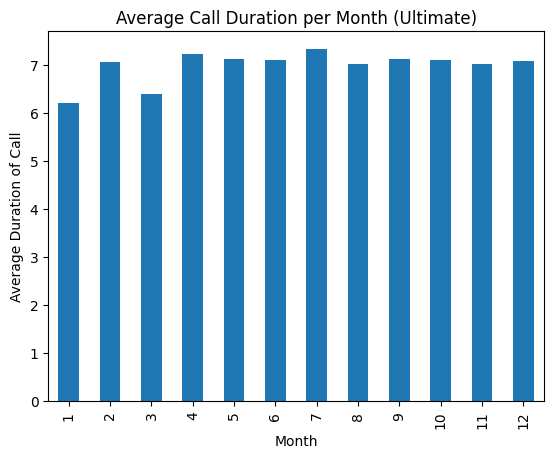

In [58]:
avg_call_ultimate.plot(kind='bar', x='month', y='avg_duration_call', legend=False)
plt.xlabel('Month')
plt.ylabel('Average Duration of Call')
plt.title('Average Call Duration per Month (Ultimate)')
plt.show()

In [59]:
surf['avg_duration_call']= round(surf['total_minutes']/surf['num_calls'], 2)
avg_call_surf=surf.groupby(['month'])['avg_duration_call'].mean().round(2).reset_index()
avg_call_surf

,month,avg_duration_call
0,1,6.64
1,2,6.81
2,3,7.20
3,4,7.04
4,5,7.18
5,6,7.22
6,7,7.03
7,8,7.13
8,9,7.13
9,10,7.10


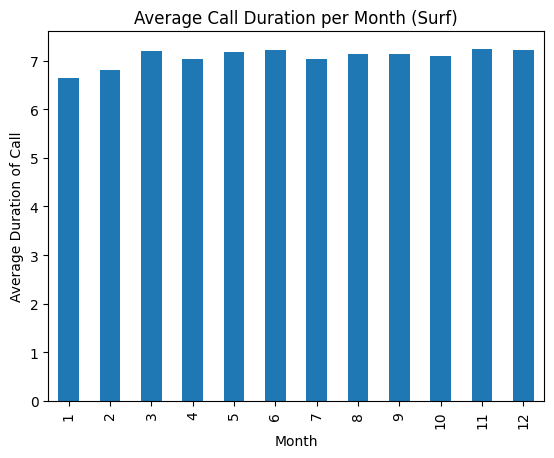

In [60]:
avg_call_surf.plot(kind='bar', x='month', y='avg_duration_call', legend=False)
plt.xlabel('Month')
plt.ylabel('Average Duration of Call')
plt.title('Average Call Duration per Month (Surf)')
plt.show()

In [61]:
surf.head()

,index,user_id,month,num_calls,total_minutes,num_messages,mb_month,gb_month,plan,extra_min,extra_messages,extra_gb,revenue_usd,avg_duration_call
0,1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,0.0,0.0,0.0,20.00,6.74
1,2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,0.0,0.0,0.0,20.00,6.43
2,3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,0.0,3.0,7.0,90.09,6.05
3,4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,0.0,0.0,4.0,60.00,6.66
4,5,1001,12,56.0,412.0,44.0,19369.18,19.0,surf,0.0,0.0,4.0,60.00,7.36


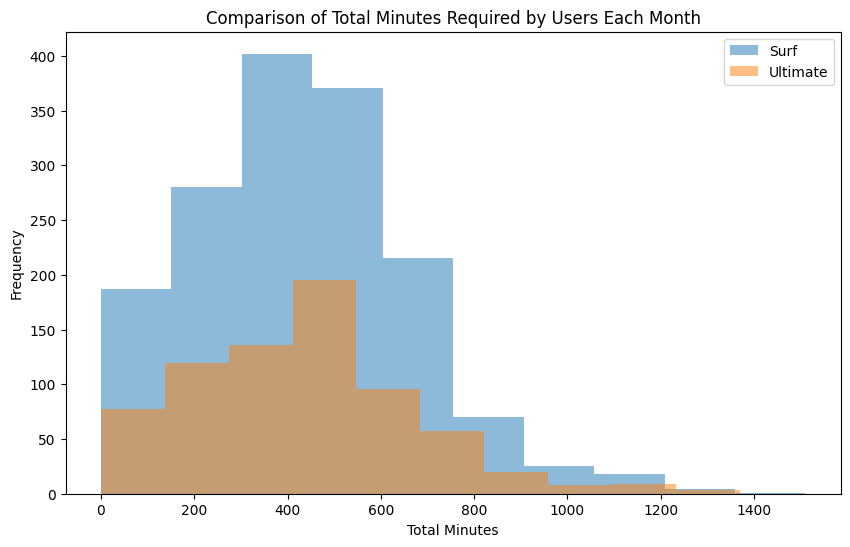

In [62]:
# Compare the number of minutes users of each plan require each month. Plot a histogram.
plt.figure(figsize=(10, 6))
plt.hist(surf['total_minutes'], bins=10, alpha=0.5, label='Surf')
plt.hist(ultimate['total_minutes'], bins=10, alpha=0.5, label='Ultimate')
plt.xlabel('Total Minutes')
plt.ylabel('Frequency')
plt.title('Comparison of Total Minutes Required by Users Each Month')
plt.legend()

# Show the plot
plt.show()

[Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [63]:
megaline_calls.head()

,id,user_id,call_date,duration,call_date_month,call_date_day,up_duration
0,1000_93,1000,2018-12-27,8.52,12,27,9
1,1000_145,1000,2018-12-27,13.66,12,27,14
2,1000_247,1000,2018-12-27,14.48,12,27,15
3,1000_309,1000,2018-12-28,5.76,12,28,6
4,1000_380,1000,2018-12-30,4.22,12,30,5


In [64]:
# Calculate the mean and the variance of the monthly call duration
monthly_call_stats = megaline_calls.groupby(['call_date_month'])['duration'].agg(['mean', 'var']).reset_index()
monthly_call_stats

,call_date_month,mean,var
0,1,6.501919,32.741969
1,2,6.701150,34.405031
2,3,6.531315,32.592684
3,4,6.759346,33.013931
4,5,6.739282,34.544859
5,6,6.804571,34.632745
6,7,6.770786,33.808500
7,8,6.690801,33.866955
8,9,6.741825,34.447367
9,10,6.704182,33.925327


<Figure size 800x600 with 0 Axes>

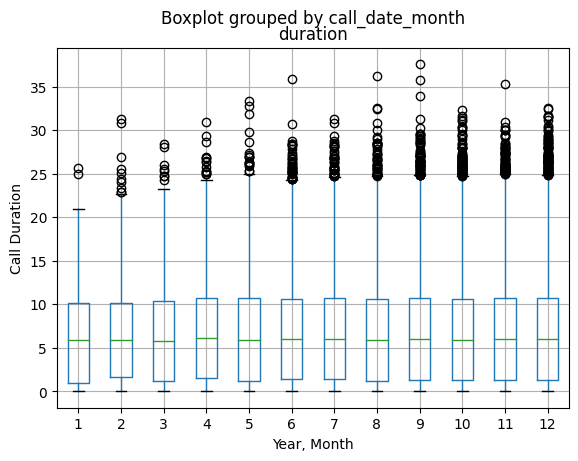

In [65]:
# Plot a boxplot to visualize the distribution of the monthly call duration
plt.figure(figsize=(8, 6))
megaline_calls.boxplot(column='duration', by=['call_date_month'])
plt.xlabel('Year, Month')
plt.ylabel('Call Duration')
plt.show()

In [66]:
megaline_calls= megaline_calls.merge(megaline_users[['user_id', 'plan']], on='user_id', how='left')
megaline_calls.head()

,id,user_id,call_date,duration,call_date_month,call_date_day,up_duration,plan
0,1000_93,1000,2018-12-27,8.52,12,27,9,ultimate
1,1000_145,1000,2018-12-27,13.66,12,27,14,ultimate
2,1000_247,1000,2018-12-27,14.48,12,27,15,ultimate
3,1000_309,1000,2018-12-28,5.76,12,28,6,ultimate
4,1000_380,1000,2018-12-30,4.22,12,30,5,ultimate


In [67]:
monthly_call_stats_ultimate = megaline_calls[megaline_calls['plan']=='ultimate'].groupby(['call_date_month'])['duration'].agg(['mean', 'var']).reset_index()
monthly_call_stats_ultimate

,call_date_month,mean,var
0,1,6.541518,35.442188
1,2,6.517230,33.688628
2,3,6.210906,32.882171
3,4,6.659990,32.071262
4,5,6.662443,34.371065
5,6,6.705188,33.435551
6,7,6.879085,34.567847
7,8,6.613484,33.681555
8,9,6.770040,34.019359
9,10,6.665850,34.206399


<Figure size 800x600 with 0 Axes>

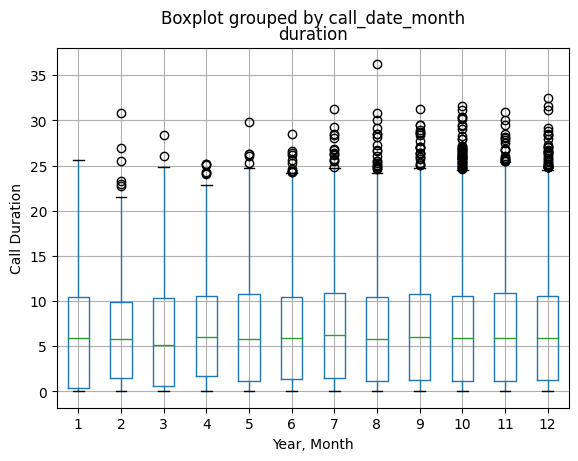

In [68]:
#ultimate boxplot
plt.figure(figsize=(8, 6))
megaline_calls[megaline_calls['plan']=='ultimate'].boxplot(column='duration', by=['call_date_month'])
plt.xlabel('Year, Month')
plt.ylabel('Call Duration')
plt.show()

In [69]:
monthly_call_stats_surf = megaline_calls[megaline_calls['plan']=='surf'].groupby(['call_date_month'])['duration'].agg(['mean', 'var']).reset_index()
monthly_call_stats_surf

,call_date_month,mean,var
0,1,6.428000,28.208311
1,2,6.906175,35.218169
2,3,6.696919,32.393177
3,4,6.799918,33.406473
4,5,6.769200,34.617366
5,6,6.846812,35.141490
6,7,6.721710,33.461154
7,8,6.726164,33.951388
8,9,6.728684,34.649189
9,10,6.722302,33.793825


<Figure size 800x600 with 0 Axes>

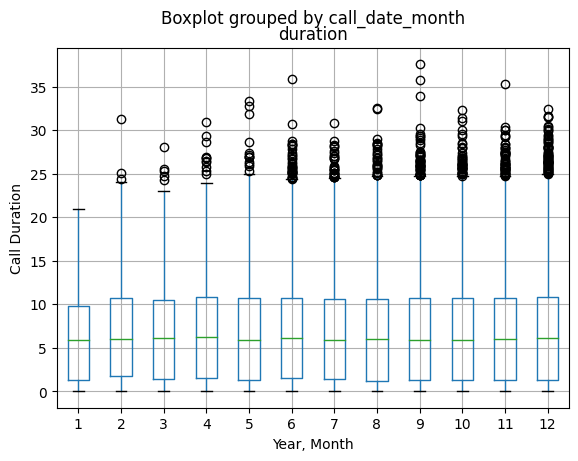

In [70]:
#ultimate boxplot
plt.figure(figsize=(8, 6))
megaline_calls[megaline_calls['plan']=='surf'].boxplot(column='duration', by=['call_date_month'])
plt.xlabel('Year, Month')
plt.ylabel('Call Duration')
plt.show()

[Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

It seams that people on both plans talk on average 6 to 8 minutes without the plan influencing it at all

### Messages

In [71]:
# Compare the number of messages users of each plan tend to send each month
#Ultimate statistics 
ultimate[['num_messages', 'extra_messages']].describe()

,num_messages,extra_messages
count,720.000000,720.0
mean,37.551389,0.0
std,34.767179,0.0
min,0.000000,0.0
25%,7.000000,0.0
50%,30.000000,0.0
75%,61.000000,0.0
max,166.000000,0.0


In [72]:
ultimate[['num_messages', 'extra_messages']].sum()

num_messages      27037.0
extra_messages        0.0
dtype: float64

In [73]:
#surf statistics 
surf[['num_messages', 'extra_messages']].describe()


,num_messages,extra_messages
count,1573.000000,1573.000000
mean,31.159568,7.012715
std,33.566717,19.470891
min,0.000000,0.000000
25%,3.000000,0.000000
50%,24.000000,0.000000
75%,47.000000,0.000000
max,266.000000,216.000000


In [74]:
surf[['num_messages', 'extra_messages']].sum()


num_messages      49014.0
extra_messages    11031.0
dtype: float64

[Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

No one on the ultimate plan would exceeds their message limit, and they send on average more messages than surf users, and everything else sounds normal 

### Internet

In [75]:
# Compare the amount of internet traffic consumed by users per plan
ultimate[['gb_month', 'mb_month','extra_gb']].describe()

,gb_month,mb_month,extra_gb
count,720.000000,720.000000,720.000000
mean,17.306944,17214.699694,0.330556
std,7.670108,7851.897435,1.627873
min,0.000000,0.000000,0.000000
25%,13.000000,12666.955000,0.000000
50%,17.000000,16858.340000,0.000000
75%,21.000000,21014.527500,0.000000
max,46.000000,46595.330000,16.000000


In [76]:
ultimate[['gb_month', 'mb_month','extra_gb']].sum()

gb_month       12461.00
mb_month    12394583.78
extra_gb         238.00
dtype: float64

In [77]:
surf[['gb_month', 'mb_month','extra_gb']].describe()

,gb_month,mb_month,extra_gb
count,1573.000000,1573.000000,1573.000000
mean,16.670693,16558.283490,3.865226
std,7.847522,8013.513327,5.445627
min,0.000000,0.000000,0.000000
25%,12.000000,11986.520000,0.000000
50%,17.000000,16829.310000,2.000000
75%,21.000000,20999.610000,6.000000
max,70.000000,70931.590000,55.000000


In [78]:
surf[['gb_month', 'mb_month','extra_gb']].sum()

gb_month       26223.00
mb_month    26046179.93
extra_gb        6080.00
dtype: float64

[Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

both plans users use almost the same amount of data with a slight increase in the average use in ultimate users, and surf users needs on average more 4 gb on their plane

## Revenue

[Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [79]:
surf.head()

,index,user_id,month,num_calls,total_minutes,num_messages,mb_month,gb_month,plan,extra_min,extra_messages,extra_gb,revenue_usd,avg_duration_call
0,1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,0.0,0.0,0.0,20.00,6.74
1,2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,0.0,0.0,0.0,20.00,6.43
2,3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,0.0,3.0,7.0,90.09,6.05
3,4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,0.0,0.0,4.0,60.00,6.66
4,5,1001,12,56.0,412.0,44.0,19369.18,19.0,surf,0.0,0.0,4.0,60.00,7.36


In [80]:
# ultimate
ultimate['revenue_usd'].describe()

count    720.000000
mean      72.313889
std       11.395108
min       70.000000
25%       70.000000
50%       70.000000
75%       70.000000
max      182.000000
Name: revenue_usd, dtype: float64

In [81]:
print('total is: ', ultimate['revenue_usd'].sum())
print('average user pays: ', round(ultimate['revenue_usd'].sum()/ultimate['revenue_usd'].count(), 2))

total is:  52066.0
average user pays:  72.31


In [82]:
#surf
surf['revenue_usd'].describe()

count    1573.000000
mean       60.706408
std        55.388042
min        20.000000
25%        20.000000
50%        40.360000
75%        80.360000
max       590.370000
Name: revenue_usd, dtype: float64

In [83]:
print('total is: ', surf['revenue_usd'].sum())
print('average user pays: ', round(surf['revenue_usd'].sum()/surf['revenue_usd'].count(), 2))

total is:  95491.18
average user pays:  60.71


[Formulate conclusions about how the revenue differs between the plans.]

It's surbrising that our surf users pays around $40 extra each month on average while ultimate plan pays only $2 extra, the big diffrence is not big in revenue but surf plan has a wider base and it suits many people so I think this suppose to be our main plan 

## Test statistical hypotheses

[Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

Null Hypothesis (H0): The average revenue from users of the Ultimate and Surf calling plans is the same.

Alternative Hypothesis (H1): The average revenue from users of the Ultimate and Surf calling plans is different.

In [84]:
# Test the hypotheses
ultimate_revenue = ultimate['revenue_usd']
surf_revenue = surf['revenue_usd']

# Perform t-test
t_stat, p_value = st.ttest_ind(ultimate_revenue, surf_revenue)
print(f"Hypothesis 1 - t-statistic: {t_stat}, p-value: {p_value}")


Hypothesis 1 - t-statistic: 5.568949166552807, p-value: 2.862674510698644e-08


We are going to reject the null hypothesis as the p value is less than %5, so there's a difference between the revenue from these two plans

[Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

Null Hypothesis (H0): The average revenue from users in the NY-NJ area is the same as that of users from other regions.

Alternative Hypothesis (H1): The average revenue from users in the NY-NJ area is different from that of users from other regions

In [85]:
ultimate= ultimate.merge(megaline_users[['user_id', 'city']], on='user_id', how='left')
surf= surf.merge(megaline_users[['user_id', 'city']], on='user_id', how='left')

In [86]:
ultimate['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Orlando-Kissimmee-Sanford, FL MSA', 'Cleveland-Elyria, OH MSA',
       'Knoxville, TN MSA', 'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA',
       'Birmingham-Hoover, AL MSA', 'Oklahoma City, OK MSA',
       'Denver-Aurora-Lakewood, CO MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Nashville-Davidson–Murfreesboro–Franklin, TN MSA',
       'Columbus, OH MSA', 'Las Vegas-Henderson-Paradise, NV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA',
       'Miami-Fort Lauderdale-West Palm Beach, FL MSA',
       'Columbia, SC MSA', 'San Antonio-New Braunfels, TX MSA',
       'Charlotte-Concord-Gastonia, NC-SC MSA',
       'Phoenix-Mesa-Chandler, AZ MSA',
       'Riverside-San Bernardino-Ontario, CA MSA',
       'Grand Rapids-Ken

In [87]:
# deviding ultimate and surf datasets 
ny_nj_revenue_ultimate = ultimate[ultimate['city'].str.contains('New York-Newark-Jersey City, NY-NJ-PA MSA')]['revenue_usd']
other_revenue_ultimate = ultimate[~ultimate['city'].str.contains('New York-Newark-Jersey City, NY-NJ-PA MSA')]['revenue_usd']

ny_nj_revenue_surf = surf[surf['city'].str.contains('New York-Newark-Jersey City, NY-NJ-PA MSA')]['revenue_usd']
other_revenue_surf = surf[~surf['city'].str.contains('New York-Newark-Jersey City, NY-NJ-PA MSA')]['revenue_usd']

In [88]:
t_stat_ny, p_value_ny = st.ttest_ind(ny_nj_revenue_ultimate, other_revenue_ultimate)
print(f"Hypothesis 2 - t-statistic for ultimate: {t_stat_ny}, p-value: {p_value_ny}")

Hypothesis 2 - t-statistic for ultimate: 1.9621843812290225, p-value: 0.05012688407875836


In [89]:
t_stat_ny, p_value_ny = st.ttest_ind(ny_nj_revenue_surf, other_revenue_surf)
print(f"Hypothesis 2 - t-statistic for surf: {t_stat_ny}, p-value: {p_value_ny}")

Hypothesis 2 - t-statistic for surf: -1.3955104327888508, p-value: 0.16305918284934595


In [90]:
# see the hypothesis for the whole data
total = pd.concat([ultimate, surf])
ny_nj_revenue_total = total[total['city'].str.contains('New York-Newark-Jersey City, NY-NJ-PA MSA')]['revenue_usd']
other_revenue_total = total[~total['city'].str.contains('New York-Newark-Jersey City, NY-NJ-PA MSA')]['revenue_usd']

t_stat_ny, p_value_ny = st.ttest_ind(ny_nj_revenue_ultimate, other_revenue_ultimate)
print(f"Hypothesis 2 - t-statistic for the whole data: {t_stat_ny}, p-value: {p_value_ny}")


Hypothesis 2 - t-statistic for the whole data: 1.9621843812290225, p-value: 0.05012688407875836


We are going to reject the alternative hypothis for both of them as they are above %5 so there's no difference between NY area and the rest

## General conclusion

[List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

- Revenue Differences: Based on the statistical analysis, the "Surf" plan tends to generate slightly higher revenue on average than the "Ultimate" plan due to extra usage, but the difference is modest.

- User Behavior: Users of both plans consume a similar amount of data and tend to talk for an average of 6-8 minutes per call, with little variation between the two plans in terms of call duration.

- Messaging Differences: Ultimate plan users send more messages on average, but no users exceeded their messaging limits.

- Test Results: For both plans, the statistical tests showed significant differences in revenue generation, leading to the rejection of the null hypothesis for revenue comparison​ 